In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.layers import Dropout, Dense

In [48]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Label:
* 0 -> T-shirt/top
* 1 -> Trouser
* 2 -> Pullover
* 3 -> Dress
* 4 -> Coat
* 5 -> Sandal
* 6 -> Shirt
* 7 -> Sneaker
* 8 -> Bag
* 9 -> Ankle boot

Shapes

In [49]:
train_images.shape

(60000, 28, 28)

In [50]:
train_labels.shape

(60000,)

In [51]:
test_images.shape

(10000, 28, 28)

In [52]:
test_labels.shape

(10000,)

In [53]:
# datatype of train_images
train_images.dtype

dtype('uint8')

In [54]:
clothes_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [ ]:
# Map labels

In [55]:
classes = [clothes_dict[k] for k in train_labels]
classes[:10]

['Ankle boot',
 'T-shirt/top',
 'T-shirt/top',
 'Dress',
 'T-shirt/top',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal']

In [ ]:
# 9 random objects from  train set

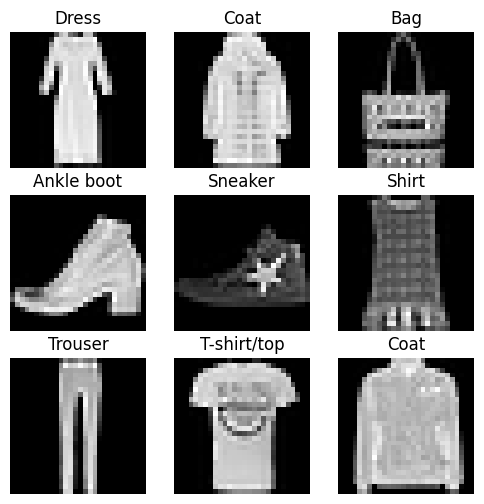

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
axes = axes.flatten()

idxs = np.random.choice(a=range(len(train_images)), size=len(axes))
for idx, axis in zip(idxs, axes):
    image = train_images[idx]
    image = np.array(image, dtype='float')
    axis.set_axis_off()
    axis.imshow(image, cmap='gray')
    axis.set_title(classes[idx])
plt.show()

## Preparation of deep network
Dense layer with 512 neurons, ReLU activation function, appropriate input size \\
Dropout with a rejection rate of 40% \\
Dense layer with 256 neurons, Tanh activation function \\
Output dense layer (number of neurons equal to number of classes), softmax activation function

In [41]:
model = models.Sequential()
# Dense layer with 512 neurons, ReLU activation function, appropriate input size (image-to-vector matrix, input_shape argument)
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
# Dropout with a rejection rate of 40%
model.add(Dropout(0.4))
# Dense layer with 256 neurons, Tanh activation function
model.add(Dense(256, activation='tanh'))
# Output dense layer (number of neurons equal to number of classes), softmax activation function
model.add(Dense(10, activation='softmax'))

In [ ]:
# Show architecture

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Compile model
optimizer adam \\
funkcję straty "categorical_crossentropy" \\
metrykę accuracy

In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Prepare input for architecture requirements

In [44]:
X_train = train_images.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = test_images.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [ ]:
# Encoding labels

In [59]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
# Train model

In [61]:
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.5192 - accuracy: 0.8096
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4050 - accuracy: 0.8507
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3701 - accuracy: 0.8633
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3489 - accuracy: 0.8705
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3333 - accuracy: 0.8756
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3190 - accuracy: 0.8806
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3100 - accuracy: 0.8852
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3010 - accuracy: 0.8860
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2925 - accuracy: 0.8914
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2834 - accuracy: 0

In [19]:
preds = model.predict(X_test)
preds

313/313 [==============================] - 1s 2ms/step


array([[3.69550150e-07, 3.33083017e-06, 1.16186857e-06, ...,
        1.51484804e-02, 2.75217332e-07, 9.81900573e-01],
       [4.84958728e-04, 2.81141883e-08, 9.83289778e-01, ...,
        1.37331311e-08, 1.35065602e-06, 2.05190940e-08],
       [1.09119901e-06, 9.99989331e-01, 2.21426390e-07, ...,
        5.83588911e-09, 1.77912455e-07, 2.07171813e-09],
       ...,
       [6.71335192e-06, 1.62504961e-08, 2.68378017e-06, ...,
        1.68768338e-07, 9.99969542e-01, 1.21219887e-08],
       [5.26714359e-07, 9.99914587e-01, 1.66975980e-07, ...,
        1.05680364e-07, 1.02067111e-06, 2.43418583e-08],
       [2.07631911e-05, 1.91120353e-06, 2.89357140e-05, ...,
        3.33654298e-03, 1.03223414e-04, 7.08860807e-06]], dtype=float32)

In [20]:
preds_classes = np.argmax(preds, axis=-1)
preds_classes

array([9, 2, 1, ..., 8, 1, 5])

In [21]:
preds_classes_dict = [clothes_dict[k] for k in preds_classes]
preds_classes_dict[:10]

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker']

In [ ]:
# 9 random objects from test set with labels from network

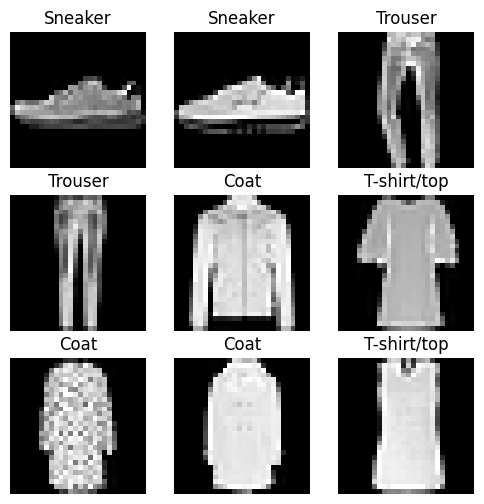

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
axes = axes.flatten()

idxs = np.random.choice(a=range(len(test_images)), size=len(axes))
for idx, axis in zip(idxs, axes):
    image = test_images[idx]
    image = np.array(image, dtype='float')
    axis.set_axis_off()
    axis.imshow(image, cmap='gray')
    axis.set_title(preds_classes_dict[idx])
plt.show()

In [23]:
false_labels = np.where(test_labels != preds_classes)[0]

In [ ]:
# 9 of incorrectly labeled objects

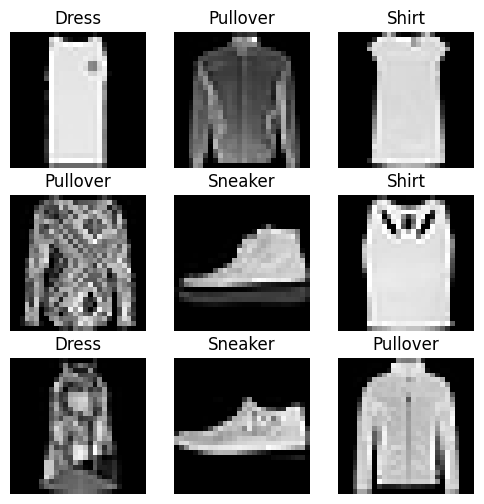

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
axes = axes.flatten()

idxs = np.random.choice(a=false_labels, size=len(axes))
for idx, axis in zip(idxs, axes):
    image = test_images[idx]
    image = np.array(image, dtype='float')
    axis.set_axis_off()
    axis.imshow(image, cmap='gray')
    axis.set_title(preds_classes_dict[idx])
plt.show()

In [ ]:
# Evaluation of model

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss', test_loss)
print('test_acc', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8753
test_loss 0.3447835445404053
test_acc 0.8752999901771545
